In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Modules are imported.')

Modules are imported.


In [3]:
heart_DS_csv = pd.read_csv(r"C:\Users\Lucas\Desktop\DataSets\heart.csv")
heart_DS_csv.shape

(918, 12)

In [4]:
numeric_df = heart_DS_csv
numeric_df['Sex'].replace({'M': 1, 'F': 0}, inplace=True)
numeric_df['RestingECG'].replace({'Normal': 0, 'ST': 1}, inplace=True)
numeric_df['ExerciseAngina'].replace({'N': 0, 'Y': 1}, inplace=True)
numeric_df['ST_Slope'].replace({'Flat': 0, 'Up': 1}, inplace=True)
numeric_df['ChestPainType'].replace({'NAP': 0, 'ATA': 1, 'ASY': 2}, inplace=True)
numeric_df.head(10)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,0,160,180,0,0,156,0,1.0,0,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,2,138,214,0,0,108,1,1.5,0,1
4,54,1,0,150,195,0,0,122,0,0.0,1,0
5,39,1,0,120,339,0,0,170,0,0.0,1,0
6,45,0,1,130,237,0,0,170,0,0.0,1,0
7,54,1,1,110,208,0,0,142,0,0.0,1,0
8,37,1,2,140,207,0,0,130,1,1.5,0,1
9,48,0,1,120,284,0,0,120,0,0.0,1,0


In [5]:
print(numeric_df.dtypes)

Age                 int64
Sex                 int64
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


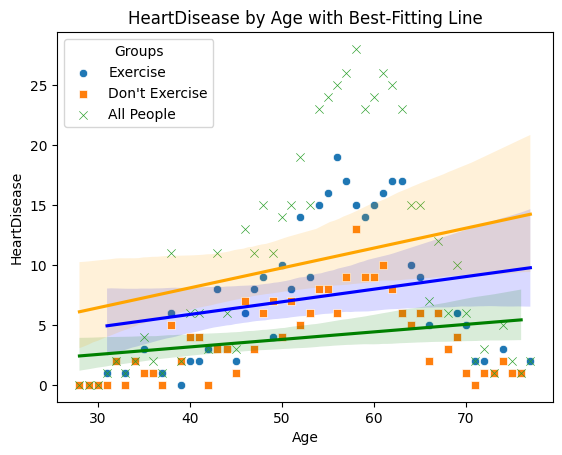

In [6]:
filtered_df_exercise = numeric_df[numeric_df['ExerciseAngina'] == 1]
filtered_df_no_exercise = numeric_df[numeric_df['ExerciseAngina'] == 0]

# Group by 'Age' and sum the 'HeartDisease' values for each age group
grouped_df_exercise = filtered_df_exercise.groupby('Age')['HeartDisease'].sum().reset_index()
grouped_df_no_exercise = filtered_df_no_exercise.groupby('Age')['HeartDisease'].sum().reset_index()
grouped_df_all = numeric_df.groupby('Age')['HeartDisease'].sum().reset_index()

# x-values and y-values for each group
x_values_exercise = grouped_df_exercise['Age']
y_values_exercise = grouped_df_exercise['HeartDisease']

x_values_no_exercise = grouped_df_no_exercise['Age']
y_values_no_exercise = grouped_df_no_exercise['HeartDisease']

x_values_all = grouped_df_all['Age']
y_values_all = grouped_df_all['HeartDisease']

# Create scatter plot and best-fitting line for people who exercise
sns.scatterplot(x=x_values_exercise, y=y_values_exercise, label='Exercise', marker='o')
sns.regplot(x=x_values_exercise, y=y_values_exercise, scatter=False, color='blue')

# Create scatter plot and best-fitting line for people who don't exercise
sns.scatterplot(x=x_values_no_exercise, y=y_values_no_exercise, label="Don't Exercise", marker='s')
sns.regplot(x=x_values_no_exercise, y=y_values_no_exercise, scatter=False, color='green')

# Create scatter plot and best-fitting line for all people
sns.scatterplot(x=x_values_all, y=y_values_all, label='All People', marker='x')
sns.regplot(x=x_values_all, y=y_values_all, scatter=False, color='orange')

# Add legend and title
plt.legend(title='Groups')
plt.title('HeartDisease by Age with Best-Fitting Line')

plt.show()

In [7]:
# Convert the offending columns to string type
df = numeric_df.copy()  # Make a copy to avoid altering the original dataframe
for col in ['ChestPainType', 'RestingECG', 'ST_Slope']:
    df[col] = df[col].astype(str)

# Separate features and labels
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.8532608695652174
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Confusion Matrix:
[[67 10]
 [17 90]]


In [11]:
# Get feature names for categorical variables after OneHotEncoding
ohe_categories = pipeline.named_steps['preprocessor'].named_transformers_['cat'].categories_

# Modify this line to handle string categories as well
new_categorical_features = [f"{col}__{category}" for col, categories in zip(categorical_features, ohe_categories) for category in categories]

# Combine all feature names
all_features = numeric_features + new_categorical_features

# Get coefficients from the logistic regression model
coefficients = pipeline.named_steps['classifier'].coef_[0]

# Combine feature names and coefficients into a DataFrame
feature_importance = pd.DataFrame({'Feature': all_features, 'Coefficient': coefficients})

# Sort by the absolute value of the coefficient
feature_importance['abs_coef'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coef', ascending=False)

# Print out
print("Feature Importance:")
print(feature_importance)


Feature Importance:
              Feature  Coefficient  abs_coef
18        ST_Slope__0     1.207663  1.207663
19        ST_Slope__1    -1.135683  1.135683
9    ChestPainType__2     0.997049  0.997049
6              Sex__1     0.620764  0.620764
5              Sex__0    -0.620623  0.620623
17  ExerciseAngina__1     0.540513  0.540513
16  ExerciseAngina__0    -0.540373  0.540373
2         Cholesterol    -0.518124  0.518124
4             Oldpeak     0.494325  0.494325
12       FastingBS__1     0.492005  0.492005
11       FastingBS__0    -0.491864  0.491864
7    ChestPainType__0    -0.467271  0.467271
8    ChestPainType__1    -0.435794  0.435794
14      RestingECG__1    -0.221069  0.221069
15    RestingECG__LVH     0.212384  0.212384
0                 Age     0.137161  0.137161
3               MaxHR    -0.114653  0.114653
10  ChestPainType__TA    -0.093843  0.093843
20     ST_Slope__Down    -0.071840  0.071840
1           RestingBP     0.032002  0.032002
13      RestingECG__0     0.008826 

# From this data I have deturmined the key risk factor for heat desease are as followed
## 1. Being male
## 2. Exercise
## 3. 

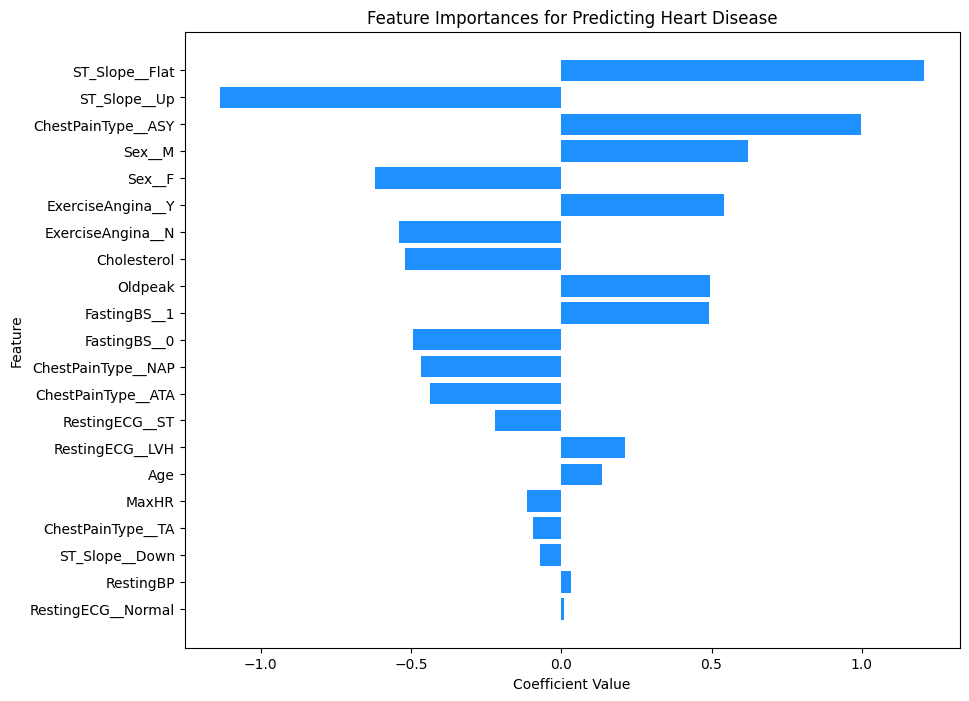

In [13]:

# Extract the logistic regression estimator from the pipeline
logreg = pipeline.named_steps['classifier']

# Extract the feature importances (coefficients)
coefficients = logreg.coef_[0]

# Get feature names for categorical variables after OneHotEncoding
ohe_categories = pipeline.named_steps['preprocessor'].named_transformers_['cat'].categories_
new_categorical_features = [f"{col}__{category}" for col, categories in zip(categorical_features, ohe_categories) for category in categories]

# Combine all feature names
all_features = numeric_features + new_categorical_features

# Create a DataFrame for the coefficients
coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients,
    'abs_coef': np.abs(coefficients)
})

sorted_coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

replacement_dict = {
    'Sex__0': 'Sex__F',
    'Sex__1': 'Sex__M',
    'RestingECG__0': 'RestingECG__Normal',
    'RestingECG__1': 'RestingECG__ST',
    'ExerciseAngina__0': 'ExerciseAngina__N',
    'ExerciseAngina__1': 'ExerciseAngina__Y',
    'ST_Slope__0': 'ST_Slope__Flat',
    'ST_Slope__1': 'ST_Slope__Up',
    'ChestPainType__0': 'ChestPainType__NAP',
    'ChestPainType__1': 'ChestPainType__ATA',
    'ChestPainType__2': 'ChestPainType__ASY'
}

sorted_coef_df['Feature'] = sorted_coef_df['Feature'].replace(replacement_dict)



# Plotting the feature importances
plt.figure(figsize=(10, 8))
plt.barh(sorted_coef_df['Feature'], sorted_coef_df['Coefficient'], color='dodgerblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importances for Predicting Heart Disease')
plt.gca().invert_yaxis()  # reverse the order for better visibility
plt.show()

